**USE ml to predict the selling price of houses based on some economic factors by using decision tree**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
boston = pd.read_csv('Boston.csv')

boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Text(0, 0.5, 'median values of home')

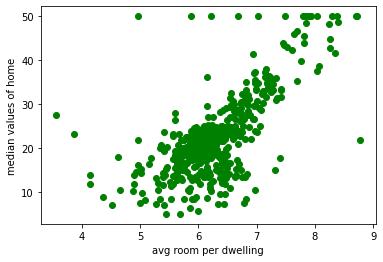

In [5]:
#lets visualize dataset
x=boston['rm']
y=boston['medv']

plt.scatter(x,y, color='g')
plt.xlabel('avg room per dwelling')
plt.ylabel('median values of home')

In [6]:
X=pd.DataFrame(x)#feature variable

Y=pd.DataFrame(y)#target variable

In [9]:
#divide data into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [10]:
#building model with decision tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion ='mse', random_state = 100, max_depth =4, min_samples_leaf=1)
#train the model
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [ ]:
pip install export viz

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file='regression_tree.dot')

In [14]:
#predict values
y_pred= regressor.predict(X_test)

In [15]:
print(y_pred[4:9])
print(Y_test[4:9])

[18.84033613 20.4884058  17.66666667 45.59444444 18.84033613]
     medv
328  19.3
445  11.8
366  21.9
273  35.2
484  20.6


In [17]:
#rmse value predict
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, Y_test)
rmse = np.sqrt(mse)
print(rmse)

6.205877969590442
